### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [45]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [46]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [47]:
vehicle = pd.read_csv('vehicle.csv')
vehicle.shape
vehicle.info()

(846, 19)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [48]:
vehicle = vehicle.dropna(axis = 0, how='any')
vehicle.shape

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [49]:
vehicle['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

In [50]:
vehicle[vehicle.isnull() == True].count()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [51]:
vehicle['class'] = vehicle['class'].astype('category')
vehicle['class'] = vehicle['class'].cat.codes
vehicle['class'].head()

0    2
1    2
2    1
3    2
4    0
Name: class, dtype: int8

In [52]:
from scipy.stats import zscore
vehicle_std = vehicle.apply(zscore)
vehicle_std.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,1.443415
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,1.443415
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,0.017538
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,1.443415
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,-1.408339


In [53]:
vehicle_std['class'].value_counts()

 0.017538    413
-1.408339    205
 1.443415    195
Name: class, dtype: int64

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [54]:
distortion=[]

You can later use this array to plot the elbow plot

In [55]:
from sklearn import metrics

### 5. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [56]:
cluster_range = range( 1, 11)  
distortion=[]
cluster_sil_scores = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(vehicle_std)
    labels = clusters.labels_                     # capture the cluster lables
    centroids = clusters.cluster_centers_         # capture the centroids
    distortion.append(clusters.inertia_ )        # capture the intertia
    
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "Distortion": distortion } )
clusters_df

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,num_clusters,Distortion
0,1,15447.000000
1,2,9416.383787
2,3,7832.765927
3,4,7174.356871
4,5,5922.013416
5,6,5386.030360
6,7,5007.777550
7,8,4574.152175
8,9,4228.170321
9,10,4008.021543


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

<Figure size 864x432 with 0 Axes>

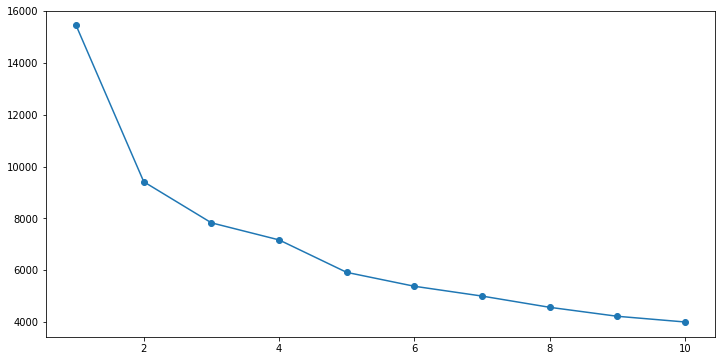

In [57]:
# Elbow plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.Distortion, marker = "o" )
plt.show()

### Find out the optimal value of K

In [ ]:
# Answer:
# considering Optimal value of K to be 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [58]:

# Number of clusters

kmeans = KMeans(n_clusters=4)

# Fitting the input data

kmeans = kmeans.fit(vehicle_std)






You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [59]:
kmeans.cluster_centers_

array([[ 1.15632670e+00,  1.18174287e+00,  1.21347280e+00,
         9.76344940e-01,  9.88432298e-02,  2.16987768e-01,
         1.29914994e+00, -1.21524845e+00,  1.30336357e+00,
         1.09588067e+00,  1.20577716e+00,  1.31045852e+00,
         1.08637729e+00, -1.07355818e-01,  1.70708874e-01,
         2.72771181e-01,  8.48147934e-03,  1.91911857e-01,
        -2.33103977e-01],
       [-2.37730480e-01, -5.54308589e-01, -3.05239681e-01,
        -6.87095297e-02,  1.56848481e-01, -1.57204060e-01,
        -4.62239376e-01,  3.29114527e-01, -4.90795205e-01,
        -5.13546443e-01, -4.23855102e-01, -4.68170816e-01,
        -5.79195318e-01, -6.12839531e-01, -7.96810230e-02,
        -1.72198584e-02,  7.65733669e-01,  6.66467072e-01,
         1.67167529e-01],
       [-7.33024343e-01,  7.27349604e-02, -2.72170954e-01,
         2.94768327e+00,  6.83665190e+00,  8.69670551e+00,
        -5.35008001e-01,  4.66247771e-01, -5.57405972e-01,
         2.83410527e-01,  1.69752769e+00, -5.88068272e-01,
    

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [60]:
# Centroid values

centroids = kmeans.cluster_centers_


Hint: Use pd.Dataframe function 

In [62]:
centroids_df = pd.DataFrame(centroids, columns = vehicle_std.columns)

In [63]:
centroids_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,1.156327,1.181743,1.213473,0.976345,0.098843,0.216988,1.299150,-1.215248,1.303364,1.095881,1.205777,1.310459,1.086377,-0.107356,0.170709,0.272771,0.008481,0.191912,-0.233104
1,-0.237730,-0.554309,-0.305240,-0.068710,0.156848,-0.157204,-0.462239,0.329115,-0.490795,-0.513546,-0.423855,-0.468171,-0.579195,-0.612840,-0.079681,-0.017220,0.765734,0.666467,0.167168
2,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651,0.730477
3,-0.947248,-0.548943,-0.931440,-1.116728,-0.581404,-0.329726,-0.793497,0.892180,-0.756374,-0.517439,-0.821912,-0.795936,-0.409577,0.828080,-0.069716,-0.277336,-1.087133,-1.161936,-0.001473


### Use kmeans.labels_ function to print out the labels of the classes

In [64]:
labels = kmeans.labels_
labels

array([1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 0, 3, 3, 1, 1, 0,
       1, 3, 0, 0, 3, 1, 1, 1, 0, 1, 3, 2, 0, 3, 0, 3, 3, 1, 0, 3, 3, 3,
       3, 1, 3, 1, 0, 1, 0, 1, 1, 3, 0, 3, 0, 3, 3, 3, 1, 3, 0, 1, 0, 0,
       1, 3, 1, 0, 1, 3, 3, 0, 1, 3, 1, 0, 1, 3, 1, 3, 0, 1, 0, 1, 3, 0,
       3, 3, 0, 3, 2, 1, 1, 3, 0, 0, 3, 3, 0, 1, 1, 3, 3, 3, 1, 0, 0, 1,
       3, 3, 1, 3, 1, 3, 3, 3, 1, 0, 0, 1, 1, 3, 0, 2, 3, 1, 3, 1, 1, 0,
       3, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 3, 1, 3, 0, 1, 1, 0, 0,
       1, 0, 3, 3, 0, 0, 1, 0, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 3, 0, 3, 3, 3, 1, 1, 0, 0, 1, 1, 1, 3, 0, 1, 1, 1,
       0, 3, 3, 0, 3, 1, 0, 3, 3, 3, 1, 0, 1, 0, 3, 3, 3, 3, 0, 1, 3, 1,
       0, 3, 1, 1, 3, 0, 3, 3, 1, 1, 0, 3, 0, 3, 1, 1, 0, 1, 1, 0, 0, 3,
       1, 1, 1, 0, 3, 1, 1, 3, 3, 1, 1, 0, 1, 3, 3, 0, 1, 1, 3, 3, 0, 3,
       1, 0, 3, 1, 2, 1, 1, 0, 1, 0, 3, 1, 1, 0, 1, 1, 1, 3, 1, 0, 0, 0,
       0, 1, 1, 0, 3, 3, 3, 1, 3, 0, 0, 3, 0, 1, 3,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [ ]:
# creating own data of equal size

In [72]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[100,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [74]:
Hierchical_df = pd.DataFrame(data = {'Col_1':a.flatten(),'Col_2':b.flatten(),'Col_3':c.flatten()})
Hierchical_df.head()

,Col_1,Col_2,Col_3
0,8.532960,4.496847,11.318279
1,-0.866259,23.036588,21.561176
2,9.684177,2.222601,8.226398
3,0.663373,22.071932,18.331624
4,10.759170,-0.499729,10.132493


### 10. Use scatter matrix to print all the 3 distributions

C:\Users\sreeharsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F432B3B70>,
      dtype=object)

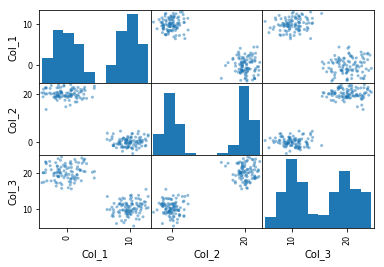

In [75]:
pd.scatter_matrix(Hierchical_df)

C:\Users\sreeharsha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


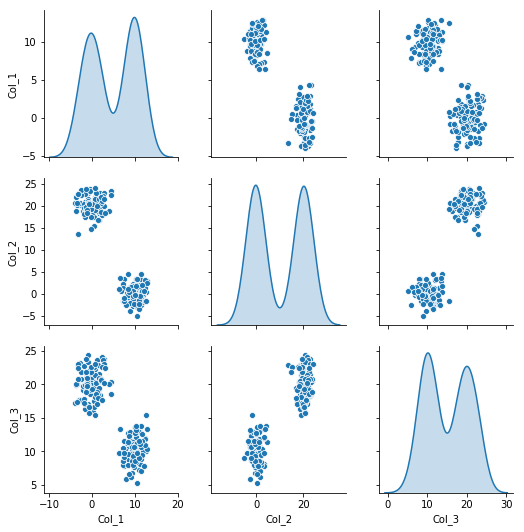

In [78]:
import seaborn as sns

sns.pairplot(Hierchical_df, diag_kind='kde')

### 11. Find out the linkage matrix

In [79]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

Use ward as linkage metric and distance as Eucledian

In [84]:
Z = linkage(Hierchical_df,method='ward',metric='euclidean')

In [85]:
Z

array([[8.60000000e+01, 1.70000000e+02, 1.16847934e-01, 2.00000000e+00],
       [1.90000000e+01, 4.10000000e+01, 1.84056669e-01, 2.00000000e+00],
       [1.80000000e+01, 6.60000000e+01, 2.81393054e-01, 2.00000000e+00],
       [1.22000000e+02, 1.68000000e+02, 2.94959280e-01, 2.00000000e+00],
       [3.40000000e+01, 1.48000000e+02, 3.46937703e-01, 2.00000000e+00],
       [7.80000000e+01, 2.02000000e+02, 3.62596100e-01, 3.00000000e+00],
       [1.00000000e+02, 1.50000000e+02, 3.71911275e-01, 2.00000000e+00],
       [7.00000000e+00, 1.53000000e+02, 3.76807619e-01, 2.00000000e+00],
       [1.59000000e+02, 1.63000000e+02, 3.82438051e-01, 2.00000000e+00],
       [5.00000000e+00, 7.70000000e+01, 3.85613047e-01, 2.00000000e+00],
       [1.30000000e+01, 3.10000000e+01, 3.94835280e-01, 2.00000000e+00],
       [2.10000000e+01, 1.67000000e+02, 4.12339183e-01, 2.00000000e+00],
       [5.40000000e+01, 6.80000000e+01, 4.83935886e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 4.90649578e

### 12. Plot the dendrogram for the consolidated dataframe

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering Dendogram')

Text(0.5, 0, 'sample index')

Text(0, 0.5, 'Distance')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [32.5, 32.5, 60.0, 60.0],
  [10.0, 10.0, 46.25, 46.25],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [80.0, 80.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [180.0, 180.0, 203.75, 203.75],
  [150.0, 150.0, 191.875, 191.875],
  [95.0, 95.0, 170.9375, 170.9375],
  [28.125, 28.125, 132.96875, 132.96875],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [281.25, 281.25, 322.5, 322.5],
  [242.5

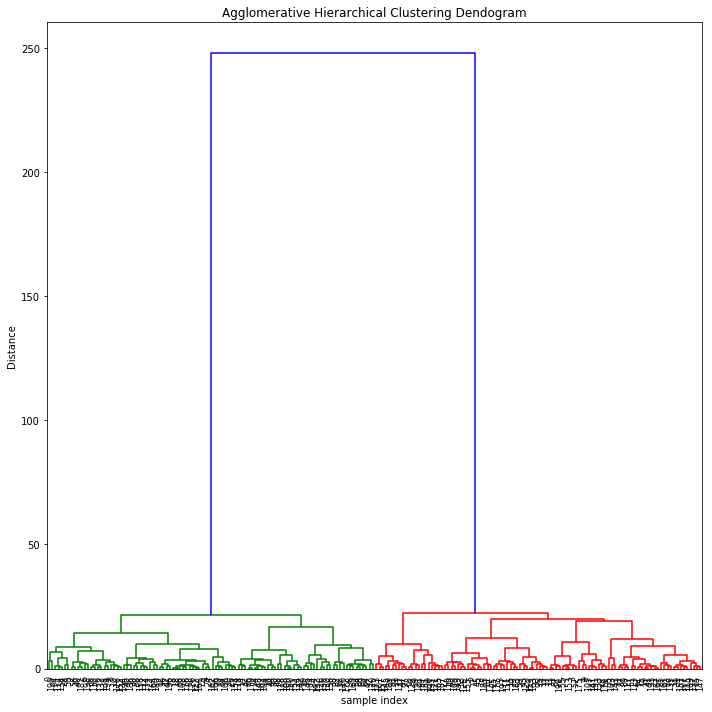

In [86]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering Dendogram')

Text(0.5, 0, 'sample index')

Text(0, 0.5, 'Distance')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [32.5, 32.5, 60.0, 60.0],
  [10.0, 10.0, 46.25, 46.25],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [80.0, 80.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [180.0, 180.0, 203.75, 203.75],
  [150.0, 150.0, 191.875, 191.875],
  [95.0, 95.0, 170.9375, 170.9375],
  [28.125, 28.125, 132.96875, 132.96875],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [281.25, 281.25, 322.5, 322.5],
  [242.5

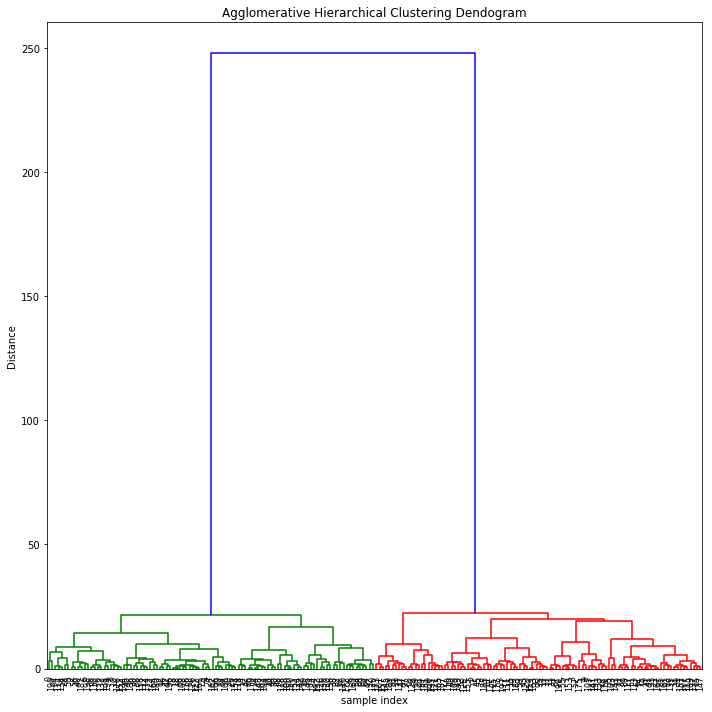

In [87]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, p = 12,leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering Dendogram')

Text(0.5, 0, 'sample index')

Text(0, 0.5, 'Distance')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [20.0, 20.0, 52.5, 52.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [82.5, 82.5, 120.0, 120.0],
  [36.25, 36.25, 101.25, 101.25],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [150.0, 150.0, 172.5, 172.5],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [200.0, 200.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [242.5, 242.5, 273.75, 273.75],
  [210.0, 210.0, 258.125, 258.125],
  [161.25, 161.25, 234.0625, 234.0625],
  [68.75, 68.75, 197.65625, 197.65625]],
 'dcoord': [[0.0, 6.806550078722209, 6.806550078722209, 0.0],
  [0.0, 7.1

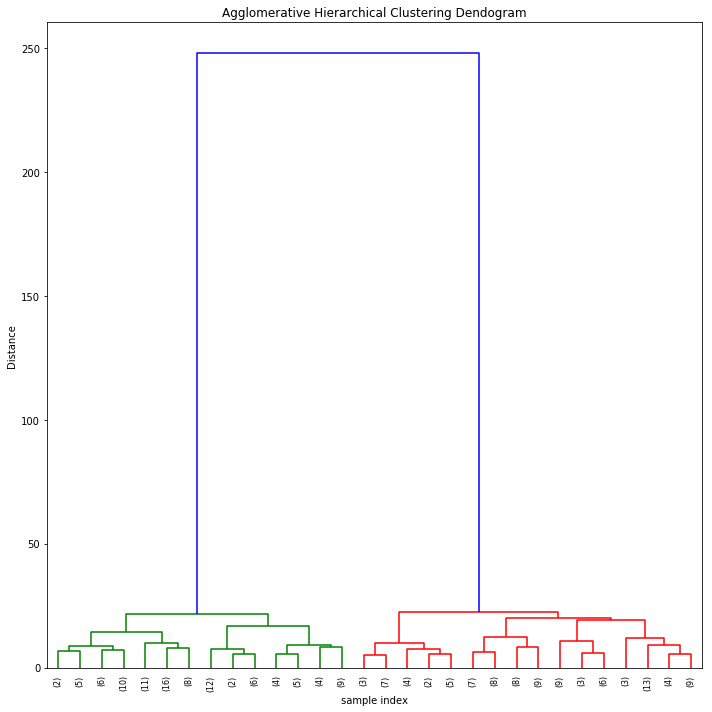

In [88]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, truncate_mode='lastp',leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [ ]:
# Answer:
# the optimal number of clusters is from 4 to 7 and the optimal distance can be choosen as 20 which will be used as input

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [89]:
import scipy.cluster as sclust

In [92]:
clus = sclust.hierarchy.fcluster(Z,t=20,criterion='distance')
clus

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 2, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 2, 4, 1, 4, 2, 4, 1, 4, 1, 4,
       2, 4, 1, 3, 2, 4, 1, 4, 2, 4, 2, 4, 1, 4, 1, 4, 2, 4, 2, 3, 2, 4,
       1, 4, 2, 3, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 2, 4, 2, 4, 1, 4, 2, 4,
       1, 4, 2, 3, 2, 3, 1, 4, 1, 3, 2, 3, 2, 3, 2, 4, 2, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 2, 3, 1, 4, 2, 4, 1, 4, 2, 3, 2, 3,
       1, 4, 1, 4, 2, 4, 1, 3, 2, 4, 2, 4, 1, 3, 2, 4, 2, 4, 2, 4, 1, 4,
       1, 4, 2, 3, 1, 4, 2, 4, 1, 4, 1, 3, 1, 4, 1, 4, 2, 3, 2, 3, 1, 4,
       1, 4, 2, 4, 1, 3, 1, 4, 2, 4, 1, 3, 2, 3, 1, 4, 2, 4, 1, 3, 1, 4,
       1, 4], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

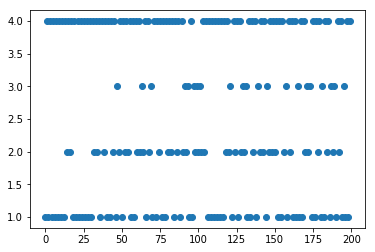

In [97]:
plt.scatter(y=clus,x=range(len(clus)))
plt.show()